In [1]:
import os
import dgl
import torch

os.environ['DGLBACKEND'] = "pytorch" 
import matplotlib as plt
import networkx as nx
import scanpy as sc 
import sklearn as sk
import squidpy as sq
import numpy as np

import graph
import visualization

ANNDATA_DIR = 'annData'
DLPFC_ANNDATA_DIR = os.path.join(ANNDATA_DIR, '1.DLPFC')

In [2]:
test_sample_id = '151507'
sample = sc.read_h5ad(os.path.join(DLPFC_ANNDATA_DIR, "{}.h5ad".format(test_sample_id)))
sample

/home/edgar/miniconda3/envs/STGCNDBC/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'layer_guess'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'layer_guess_colors', 'spatial'
    obsm: 'spatial'

In [3]:
# Create a DGL graph object
g = graph.create_dgl_graph(sample)

In [4]:
subgraph = graph.create_random_dgl_subgraph(g, 200)

In [5]:
init_pos = visualization.get_initial_dgl_graph_positions(subgraph)
network = visualization.sample_networkx_from_dgl(subgraph)

In [6]:
pos = visualization.weighted_layout(network, init_pos=init_pos)

In [7]:
network_weights, minw, maxw, rangew = visualization.get_network_weights(network)

In [8]:
# network_weights

In [9]:
# labels = {(u,v,): '{:.3}'.format(data['w'].numpy().item()) for u,v,data in network.edges(data=True)}
# labels

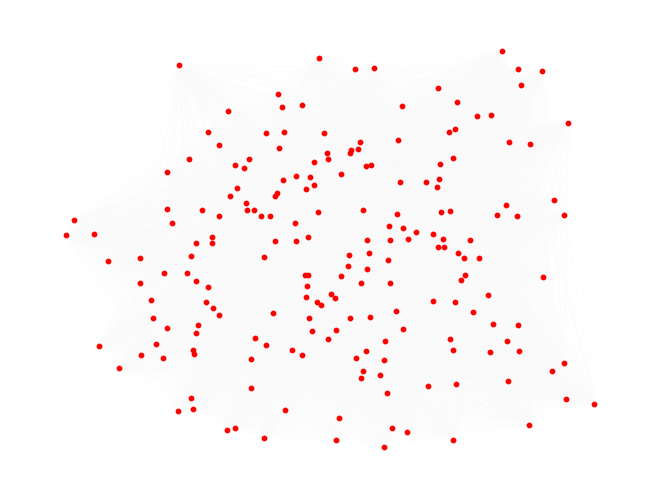

In [10]:
nx.draw(network, pos=subgraph.ndata['coords'].numpy(), node_size=10, width=0.3, node_color='red', edge_color=network_weights, edge_vmin=0, edge_vmax=1,  edge_cmap=plt.cm.gist_yarg)
# nx.draw_networkx_labels(network, pos=subgraph.ndata['coords'].numpy())
# nx.draw_networkx_edge_labels(network, pos=subgraph.ndata['coords'].numpy(), edge_labels=labels, label_pos=0.5)

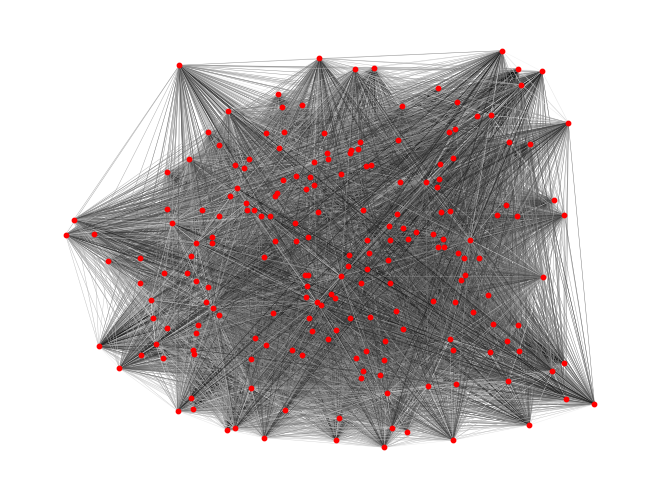

In [11]:
nx.draw(network, pos=pos, node_size=10, width=0.3, node_color='red', edge_color=network_weights, edge_vmin=minw, edge_vmax=maxw,  edge_cmap=plt.cm.gist_yarg)
# nx.draw_networkx_labels(network, pos=subgraph.ndata['coords'].numpy())

In [12]:
spring_pos = nx.spring_layout(network, pos=init_pos, weight='w')

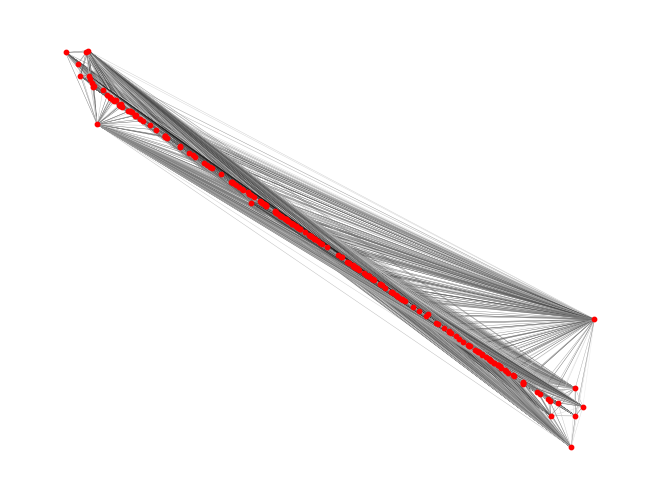

In [13]:
nx.draw(network, pos=spring_pos, node_size=10, width=0.3, node_color='red', edge_color=network_weights, edge_vmin=minw, edge_vmax=maxw,  edge_cmap=plt.cm.gist_yarg)
# nx.draw_networkx_labels(network, pos=subgraph.ndata['coords'].numpy())

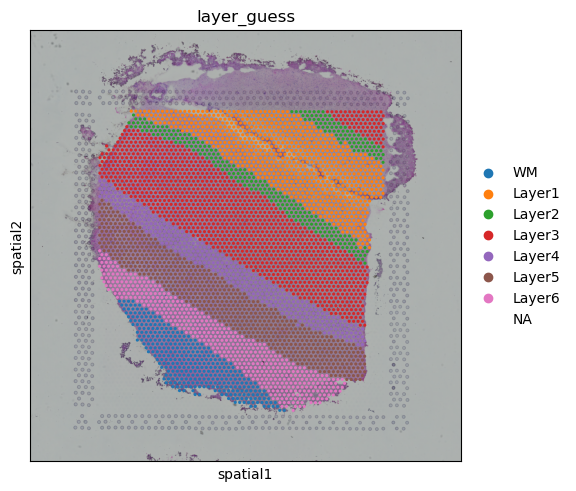

In [14]:
sq.pl.spatial_scatter(sample, color='layer_guess')